In [12]:
# %% -------------------- IMPORT THƯ VIỆN --------------------
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [13]:
# 1. Tải dữ liệu
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [14]:
# Bảng ánh xạ số -> tên lớp
label_names = [
    "T-shirt/top",  # 0
    "Trouser",      # 1
    "Pullover",     # 2
    "Dress",        # 3
    "Coat",         # 4
    "Sandal",       # 5
    "Shirt",        # 6
    "Sneaker",      # 7
    "Bag",          # 8
    "Ankle boot"    # 9
]

print("📌 Bảng nhãn lớp trong Fashion-MNIST:\n")
for i, name in enumerate(label_names):
    print(f"{i}: {name}")

print("\n📊 Số lượng ảnh theo từng lớp:\n")

for i, name in enumerate(label_names):
    n_train = np.sum(y_train == i)
    n_test = np.sum(y_test == i)
    print(f"{name:15}: Train = {n_train:5d} | Test = {n_test:5d} | Tổng = {n_train + n_test:5d}")

print(f"\nTổng ảnh: Train = {len(y_train)} | Test = {len(y_test)} | All = {len(y_train) + len(y_test)}")

📌 Bảng nhãn lớp trong Fashion-MNIST:

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

📊 Số lượng ảnh theo từng lớp:

T-shirt/top    : Train =  6000 | Test =  1000 | Tổng =  7000
Trouser        : Train =  6000 | Test =  1000 | Tổng =  7000
Pullover       : Train =  6000 | Test =  1000 | Tổng =  7000
Dress          : Train =  6000 | Test =  1000 | Tổng =  7000
Coat           : Train =  6000 | Test =  1000 | Tổng =  7000
Sandal         : Train =  6000 | Test =  1000 | Tổng =  7000
Shirt          : Train =  6000 | Test =  1000 | Tổng =  7000
Sneaker        : Train =  6000 | Test =  1000 | Tổng =  7000
Bag            : Train =  6000 | Test =  1000 | Tổng =  7000
Ankle boot     : Train =  6000 | Test =  1000 | Tổng =  7000

Tổng ảnh: Train = 60000 | Test = 10000 | All = 70000


In [ ]:
# 2. Xây dựng mô hình CNN cải tiến
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),     # 28→14

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),     # 14→7

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Flatten(),               # 7×7×128 = 6272

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),            # tránh overfitting
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

d:\Tong\cv_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,906 (3.42 MB)

 Trainable params: 896,906 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8412 - loss: 0.4390 - val_accuracy: 0.8862 - val_loss: 0.3094
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8987 - loss: 0.2787 - val_accuracy: 0.8997 - val_loss: 0.2663
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9146 - loss: 0.2341 - val_accuracy: 0.9108 - val_loss: 0.2475
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9253 - loss: 0.2012 - val_accuracy: 0.9138 - val_loss: 0.2419
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9341 - loss: 0.1777 - val_accuracy: 0.9137 - val_loss: 0.2414


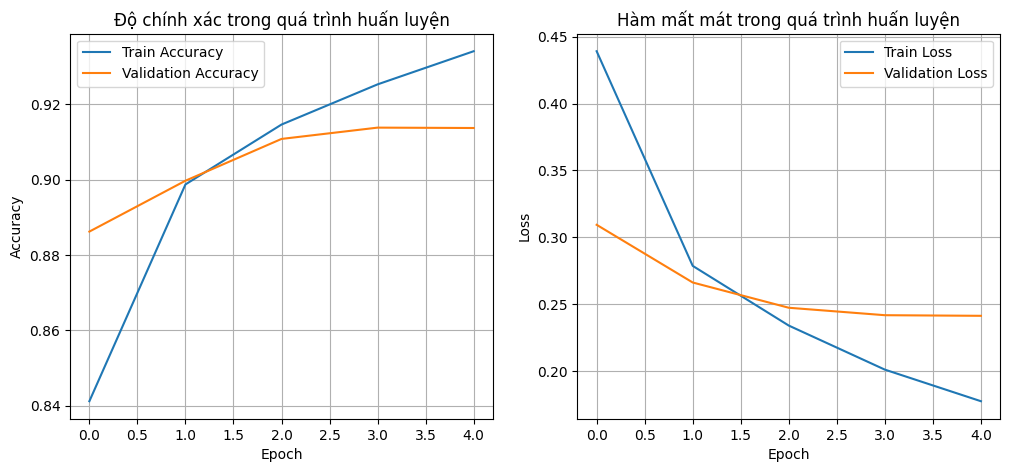

In [16]:
# 3. Biên dịch và huấn luyện
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Lưu lại lịch sử huấn luyện
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

# 4. Trực quan hóa kết quả huấn luyện
plt.figure(figsize=(12, 5))

# ---- Biểu đồ Accuracy ----
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Độ chính xác trong quá trình huấn luyện')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# ---- Biểu đồ Loss ----
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Hàm mất mát trong quá trình huấn luyện')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


In [17]:
# 4. Đánh giá
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
print(f"Kết quả đánh giá trên tập huấn luyện:{train_acc*100:.2f}%")
print(f"Độ chính xác trên tập kiểm tra: {test_acc*100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.9137 - loss: 0.2414
1875/1875 - 5s - 3ms/step - accuracy: 0.9475 - loss: 0.1391
Kết quả đánh giá trên tập huấn luyện:94.75%
Độ chính xác trên tập kiểm tra: 91.37%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


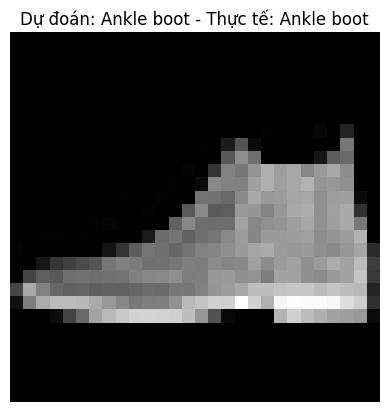

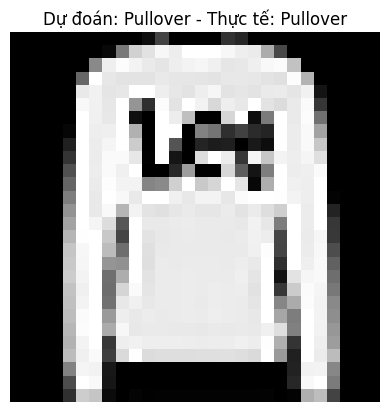

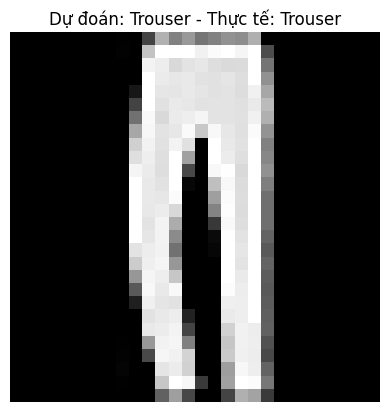

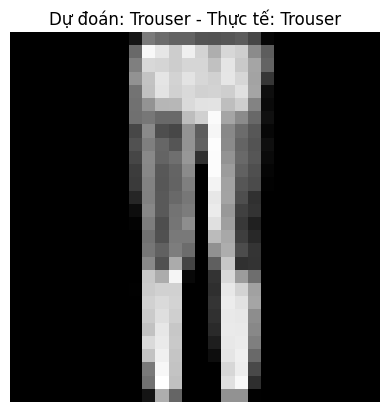

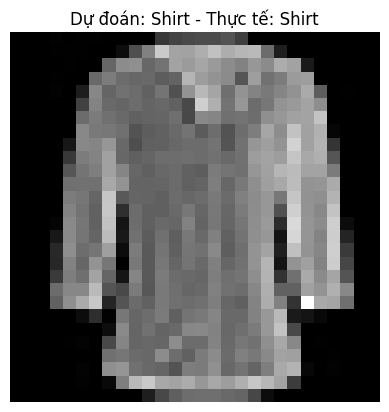

In [25]:
#-------------------------------Thử nghiệm với ảnh --------------------------------#
# %%
import numpy as np
import matplotlib.pyplot as plt

# Dự đoán xác suất các lớp
predictions = model.predict(x_test)
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
# Hàm tìm lớp có xác suất cao nhất
def predict_label(i):
    pred = np.argmax(predictions[i])
    true = y_test[i]
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Dự đoán: {class_names[pred]} - Thực tế: {class_names[true]}")
    plt.axis('off')
    plt.show()

# Thử 5 ảnh đầu tiên
for i in range(5):
    predict_label(i)

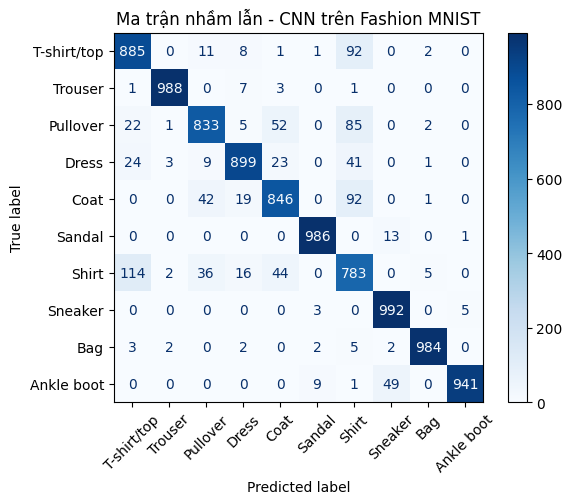

In [19]:
# Ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)

# Trực quan hóa với tên nhãn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)

plt.title("Ma trận nhầm lẫn - CNN trên Fashion MNIST")
plt.show()

In [30]:
# -----------------------Dự đoán với ảnh tùy chọn----------------------------#
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_custom_image(path):
    img = image.load_img(path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = 1 - img_array # Đảo màu nếu cần thiết, vì ảnh gốc có nền trắng và ảnh huấn luyện có nền đen
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    pred_label = np.argmax(prediction)

    plt.imshow(img, cmap='gray')
    plt.title(f"Dự đoán: {class_names[pred_label]}")
    plt.axis('off')
    plt.show()

    for i, name in enumerate(class_names):
        print(f"{name:15s}: {prediction[0][i]*100:.2f}%")




class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


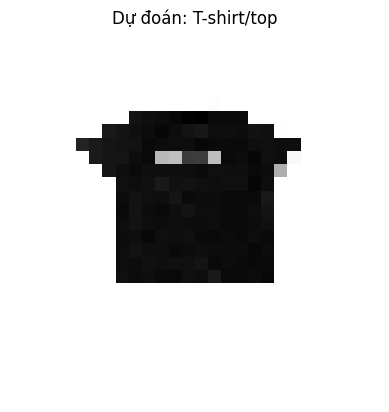

T-shirt/top    : 86.05%
Trouser        : 0.00%
Pullover       : 0.04%
Dress          : 0.01%
Coat           : 0.00%
Sandal         : 0.00%
Shirt          : 8.43%
Sneaker        : 0.01%
Bag            : 5.45%
Ankle boot     : 0.01%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


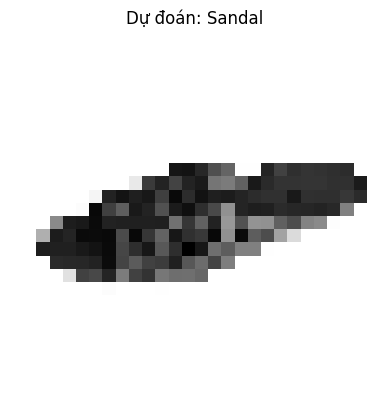

T-shirt/top    : 0.03%
Trouser        : 0.00%
Pullover       : 0.00%
Dress          : 0.00%
Coat           : 0.00%
Sandal         : 99.91%
Shirt          : 0.00%
Sneaker        : 0.01%
Bag            : 0.05%
Ankle boot     : 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


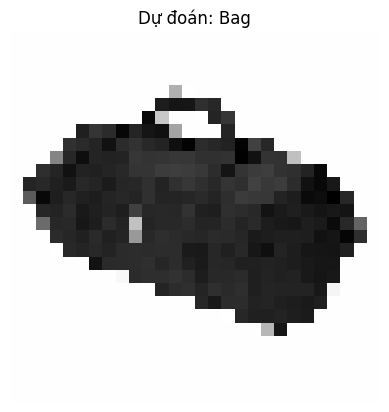

T-shirt/top    : 0.01%
Trouser        : 0.00%
Pullover       : 0.00%
Dress          : 0.00%
Coat           : 0.01%
Sandal         : 0.00%
Shirt          : 0.05%
Sneaker        : 0.00%
Bag            : 99.94%
Ankle boot     : 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


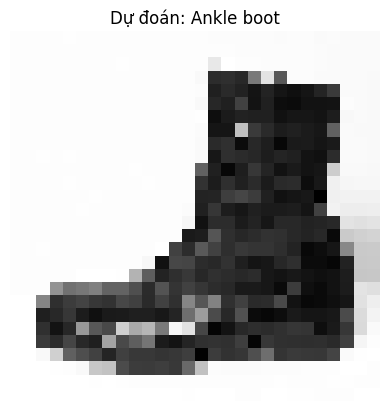

T-shirt/top    : 0.00%
Trouser        : 0.00%
Pullover       : 0.00%
Dress          : 0.00%
Coat           : 0.00%
Sandal         : 0.00%
Shirt          : 0.00%
Sneaker        : 0.01%
Bag            : 0.00%
Ankle boot     : 99.99%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


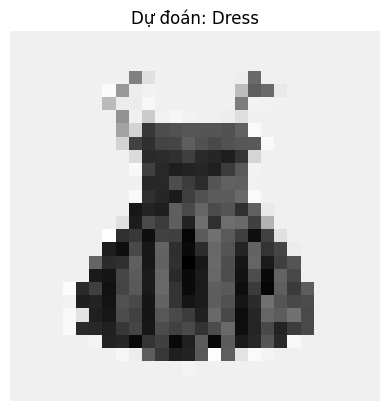

T-shirt/top    : 4.79%
Trouser        : 3.66%
Pullover       : 0.32%
Dress          : 65.10%
Coat           : 2.69%
Sandal         : 3.64%
Shirt          : 4.75%
Sneaker        : 0.68%
Bag            : 13.14%
Ankle boot     : 1.23%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


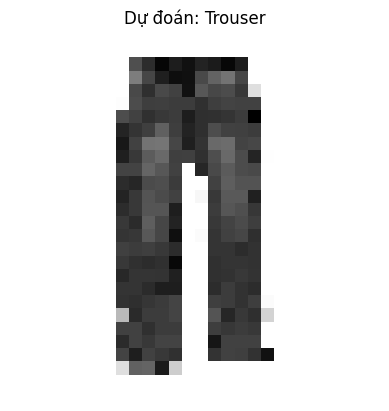

T-shirt/top    : 0.00%
Trouser        : 99.96%
Pullover       : 0.00%
Dress          : 0.00%
Coat           : 0.04%
Sandal         : 0.00%
Shirt          : 0.00%
Sneaker        : 0.00%
Bag            : 0.00%
Ankle boot     : 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


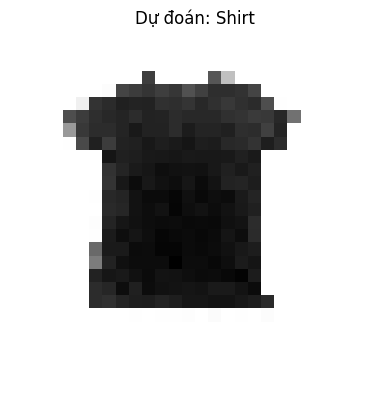

T-shirt/top    : 19.40%
Trouser        : 0.01%
Pullover       : 0.81%
Dress          : 19.84%
Coat           : 12.93%
Sandal         : 0.14%
Shirt          : 43.13%
Sneaker        : 0.46%
Bag            : 3.02%
Ankle boot     : 0.28%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


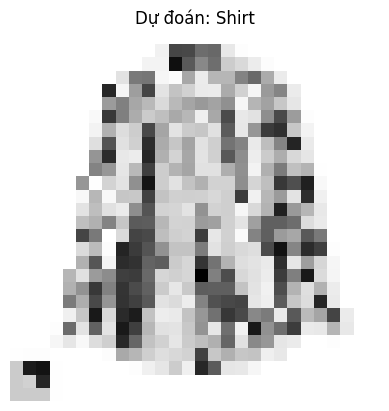

T-shirt/top    : 0.14%
Trouser        : 0.00%
Pullover       : 0.36%
Dress          : 2.47%
Coat           : 13.04%
Sandal         : 0.01%
Shirt          : 56.35%
Sneaker        : 0.03%
Bag            : 27.56%
Ankle boot     : 0.04%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


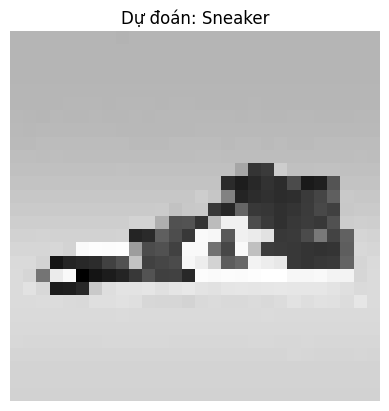

T-shirt/top    : 0.76%
Trouser        : 0.00%
Pullover       : 0.00%
Dress          : 0.00%
Coat           : 0.00%
Sandal         : 1.10%
Shirt          : 0.03%
Sneaker        : 52.82%
Bag            : 45.24%
Ankle boot     : 0.04%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


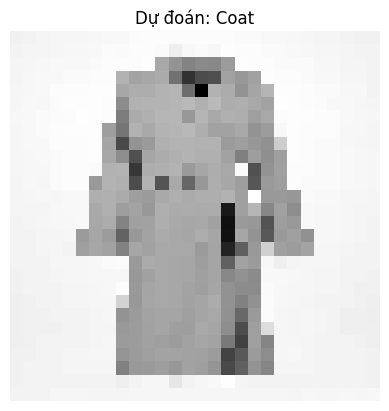

T-shirt/top    : 4.58%
Trouser        : 0.03%
Pullover       : 11.26%
Dress          : 7.33%
Coat           : 48.74%
Sandal         : 0.06%
Shirt          : 23.77%
Sneaker        : 0.19%
Bag            : 3.76%
Ankle boot     : 0.29%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


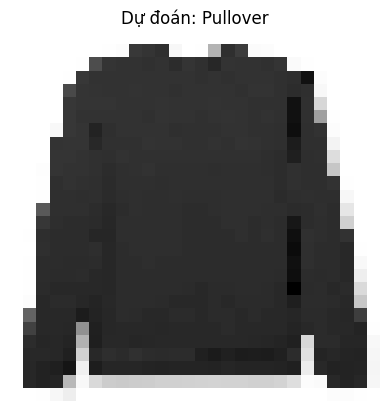

T-shirt/top    : 0.71%
Trouser        : 0.00%
Pullover       : 50.58%
Dress          : 0.00%
Coat           : 0.10%
Sandal         : 0.00%
Shirt          : 48.61%
Sneaker        : 0.00%
Bag            : 0.00%
Ankle boot     : 0.00%


In [ ]:
predict_custom_image('img/test9.jpg')
predict_custom_image('img/test22.png')
predict_custom_image('img/test15.jpg')
predict_custom_image('img/test14.jpg')
predict_custom_image('img/test5.jpg')
predict_custom_image('img/test12.jpg')
predict_custom_image('img/test16.jpg')
predict_custom_image('img/test17.png')
predict_custom_image('img/test18.jpg')
predict_custom_image('img/test19.jpg')
predict_custom_image('img/test20.jpg')
predict_custom_image('img/test21.png')

In [22]:
print("\n📋 Báo cáo phân loại:\n", classification_report(y_test, y_pred))



📋 Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.89      0.83      0.86      1000
           3       0.94      0.90      0.92      1000
           4       0.87      0.85      0.86      1000
           5       0.99      0.99      0.99      1000
           6       0.71      0.78      0.75      1000
           7       0.94      0.99      0.96      1000
           8       0.99      0.98      0.99      1000
           9       0.99      0.94      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [47]:
model.save('cnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


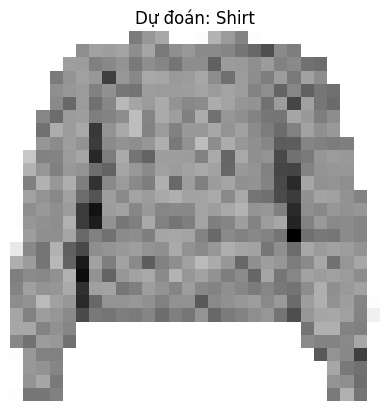

T-shirt/top    : 0.74%
Trouser        : 0.01%
Pullover       : 33.43%
Dress          : 0.07%
Coat           : 4.07%
Sandal         : 0.00%
Shirt          : 61.65%
Sneaker        : 0.00%
Bag            : 0.02%
Ankle boot     : 0.01%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


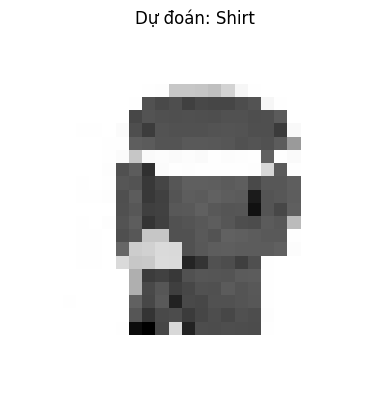

T-shirt/top    : 18.84%
Trouser        : 0.00%
Pullover       : 0.31%
Dress          : 0.30%
Coat           : 11.63%
Sandal         : 0.01%
Shirt          : 64.01%
Sneaker        : 0.02%
Bag            : 4.86%
Ankle boot     : 0.01%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


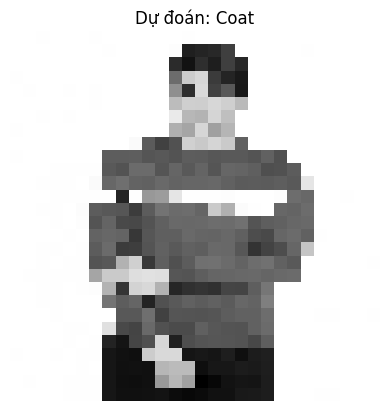

T-shirt/top    : 1.15%
Trouser        : 0.02%
Pullover       : 1.43%
Dress          : 1.22%
Coat           : 83.87%
Sandal         : 0.38%
Shirt          : 7.63%
Sneaker        : 0.01%
Bag            : 4.25%
Ankle boot     : 0.03%


In [53]:
predict_custom_image('img/test23.png')
predict_custom_image('img/test24.png')
